In [6]:
from IPython.display import Image

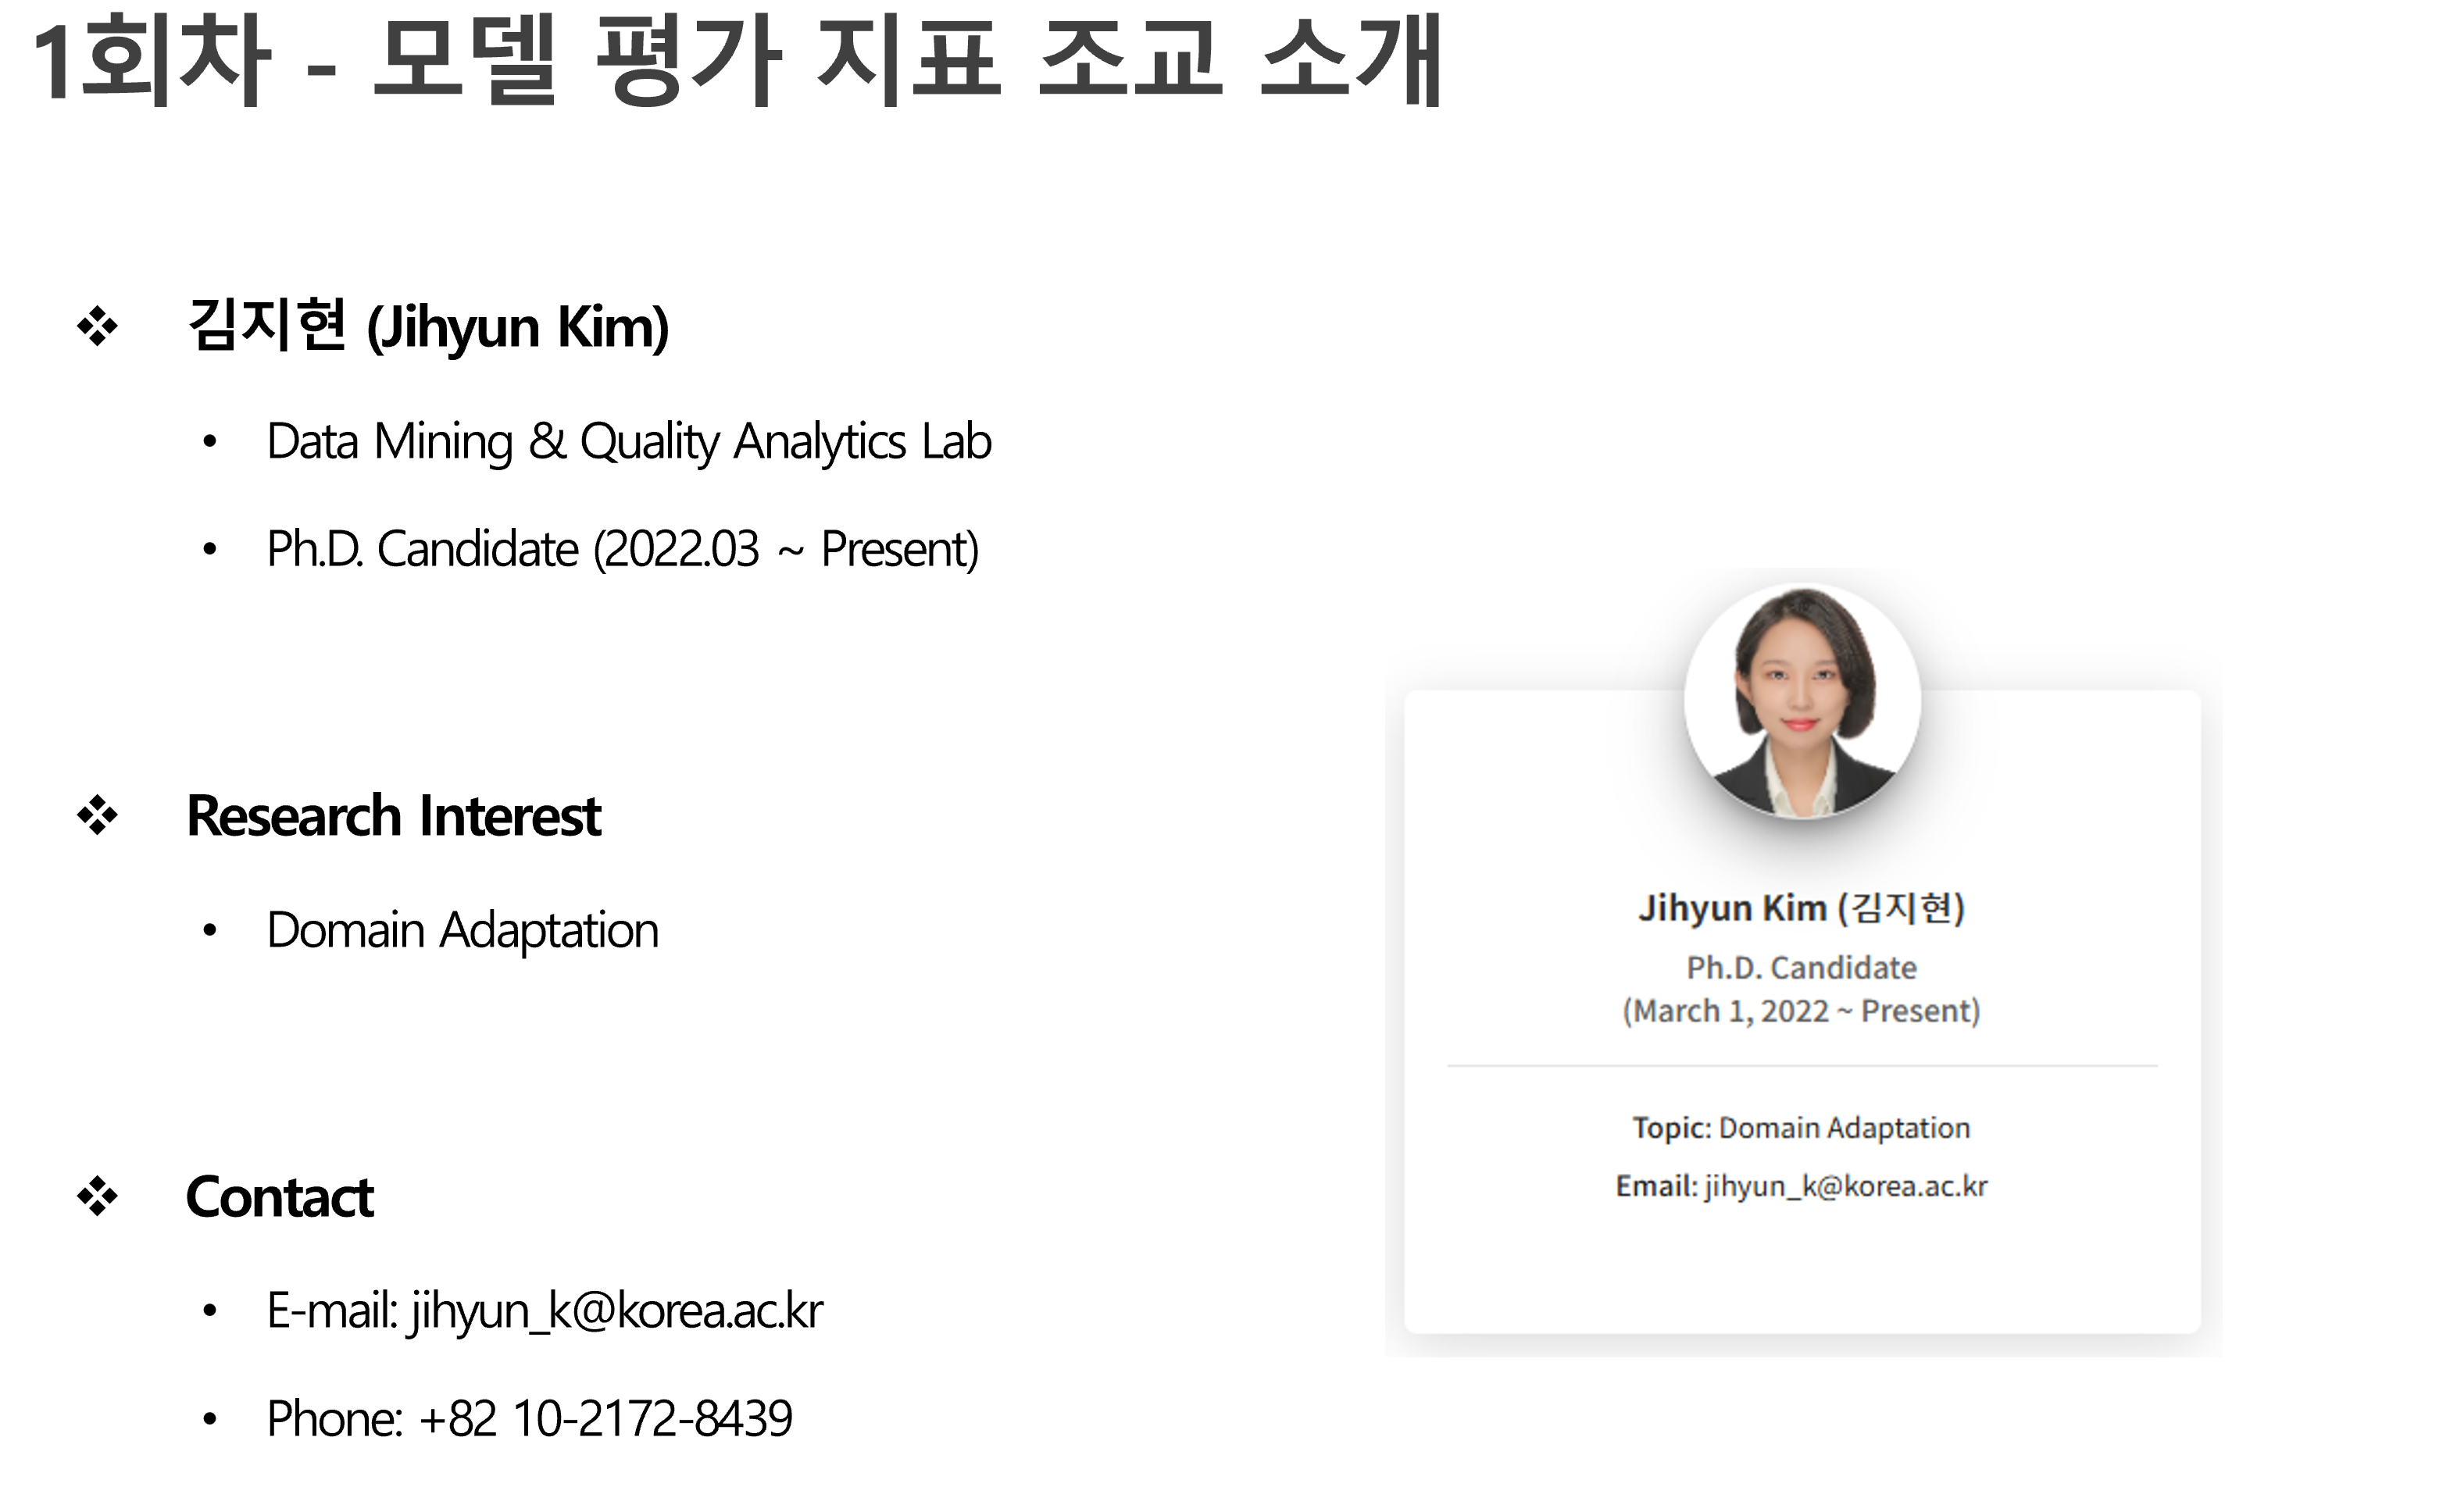

In [7]:
Image('./images/jihyun.png')

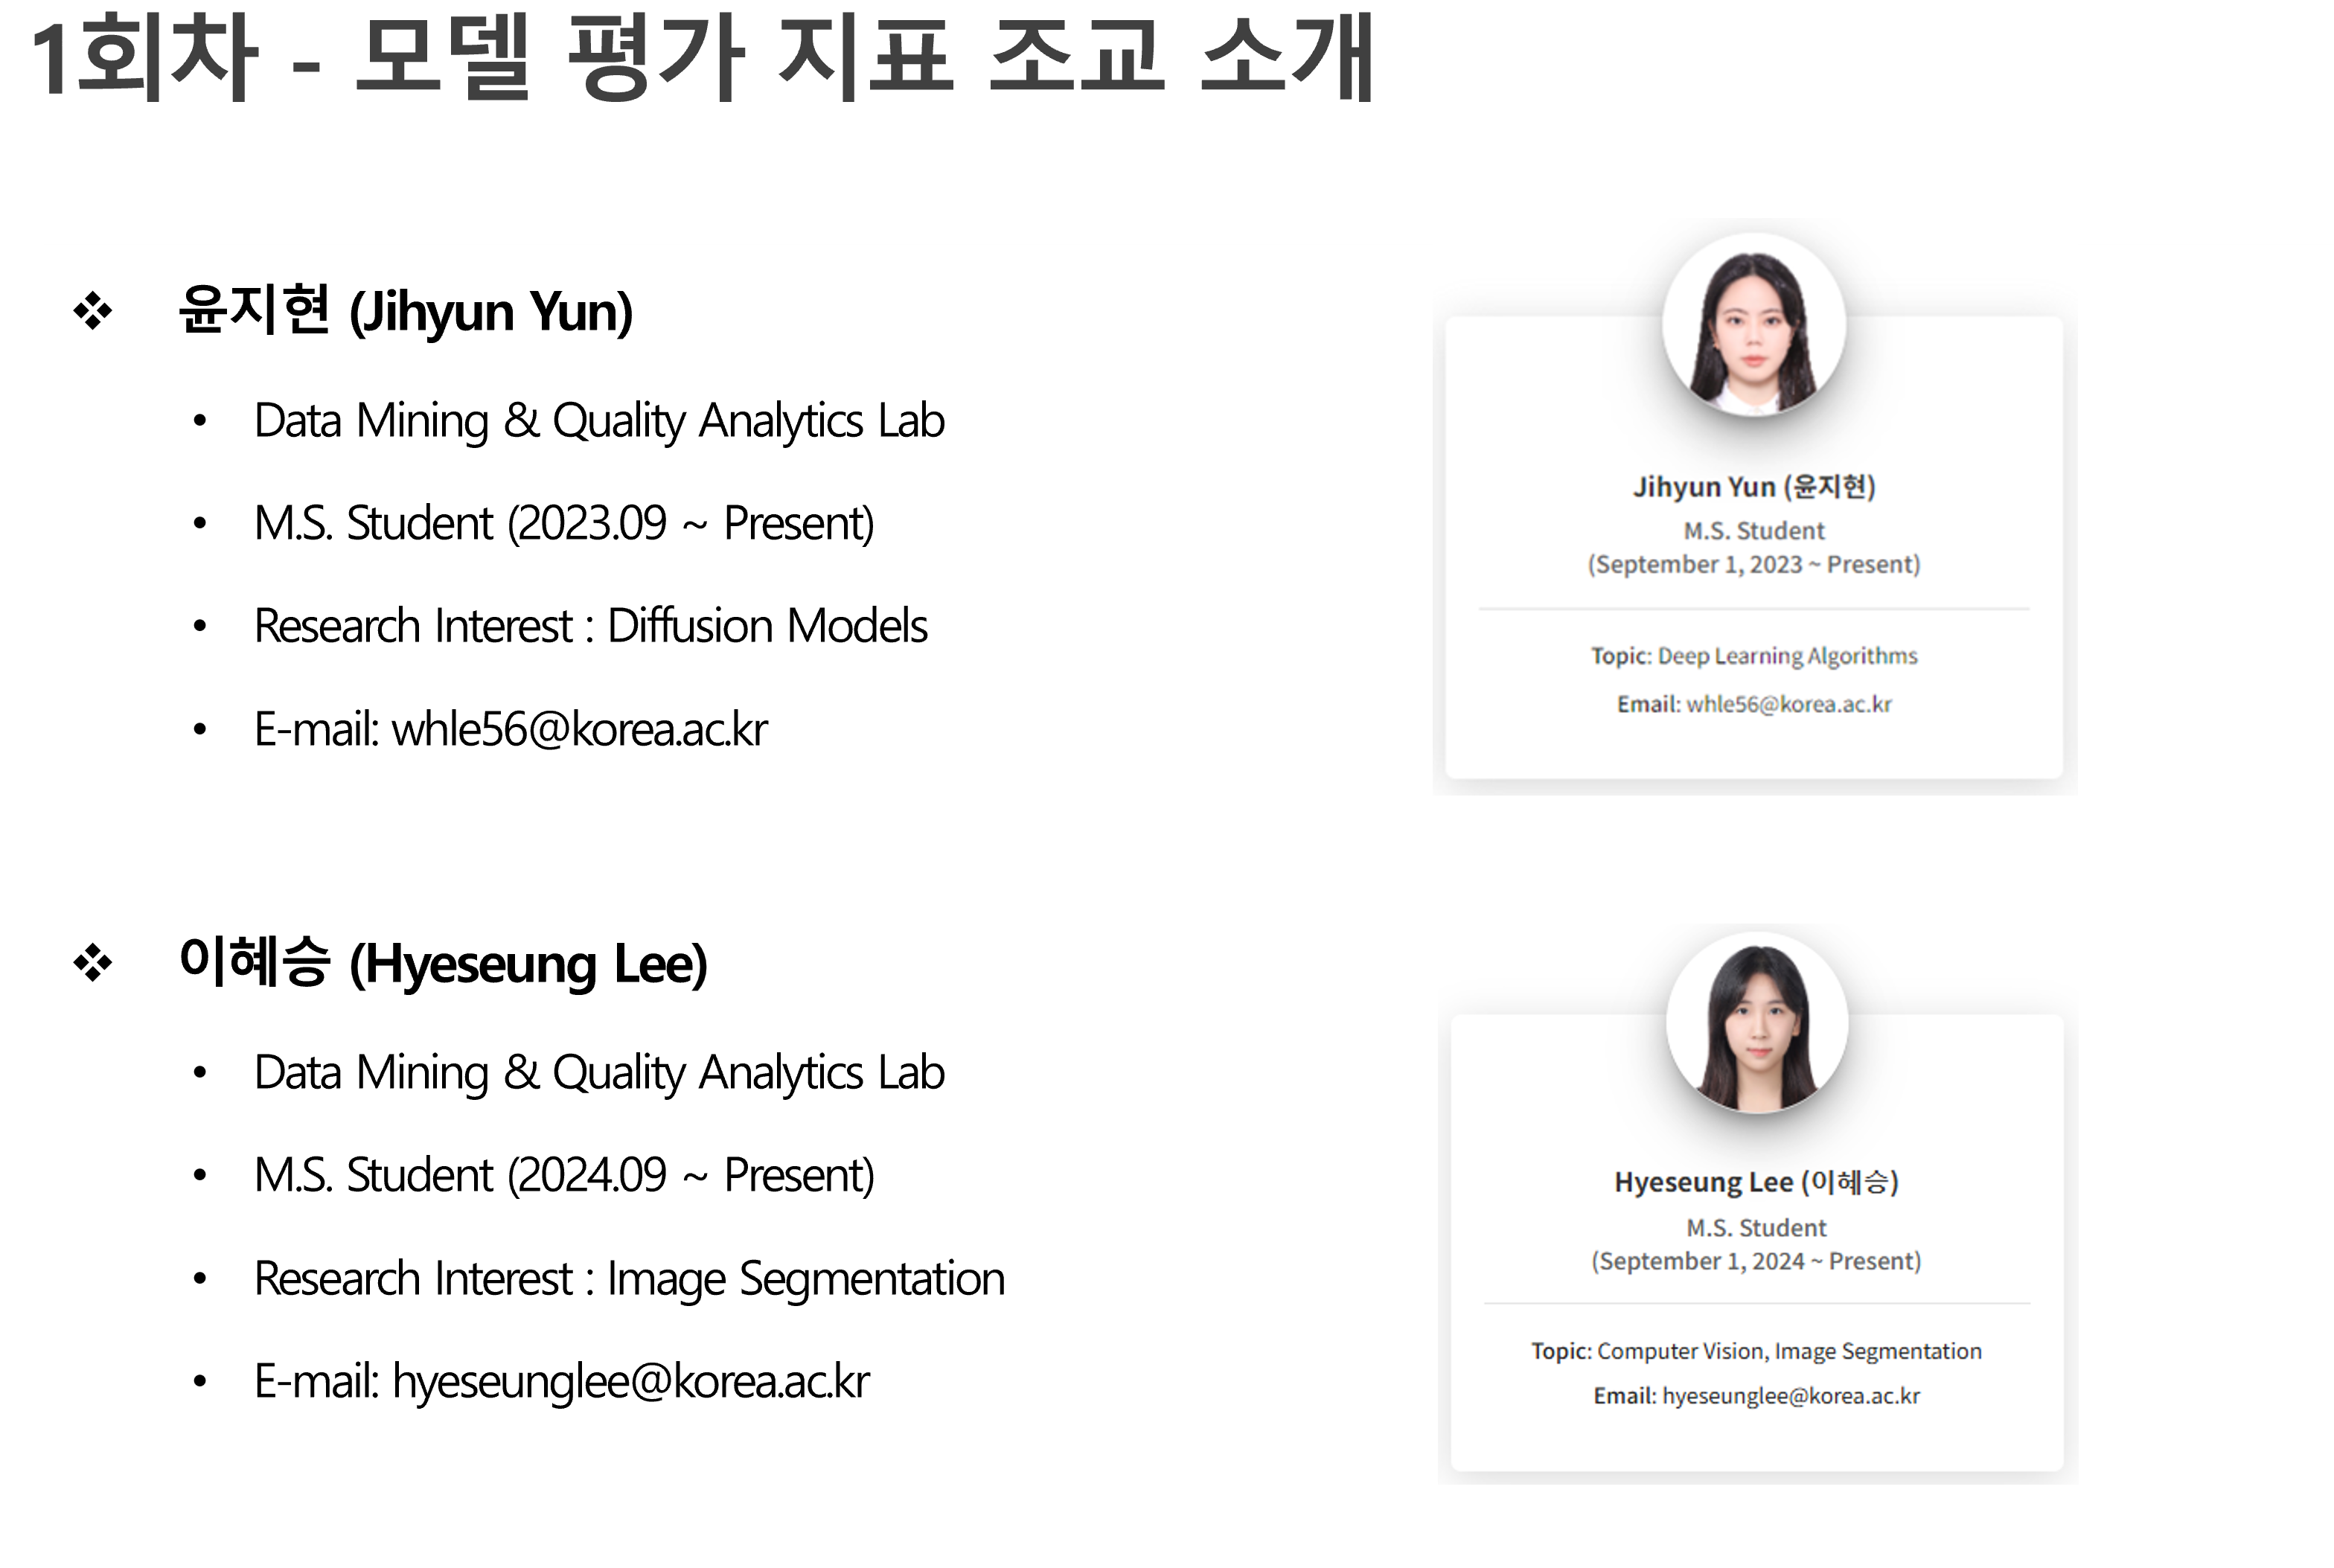

In [8]:
Image('./images/assistant.png')

## TO DO: 25.02.28 - 머신러닝 모델 평가 방식 (이진분류, Binary Classification)

### 0.  라이브러리 호출

In [9]:
# 모듈 불러오기

'''data handling'''
import numpy as np
import pandas as pd

'''visualization'''
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image  # for showing image file

'''warning handling'''
import warnings
warnings.filterwarnings(action='ignore')

### 1. 데이터 불러오기: Breast cancer diagnostic dataset (유방암 여부 진단)

__데이터 구조__
* 관측치 개수: 569개
* 변수 개수: 입력/설명/독립변수 30개 / 출력변수: 1개

**입력 변수(원인: 예측값을 설명할 수 있는 변수) -> "X"**   
해당 데이터셋의 입력 변수는 유방암 종양의 세포 핵의 특징을 기반으로 계산된 값  

- radius: 종양 세포의 평균 반지름
- texture: 픽셀 강도의 표준편차
- perimeter: 주변 길이
- area: 면적
- smoothness: 매끄러움
- compactness, concavity 등: 종양 모양을 분석하는 특징
- fractal dimension: 종양의 경계 복잡성

**출력 변수(결과: 예측하고자 하는 값, 모델 출력 값) -> "Y"**
- class: malignant - 악성-유방암, benign - 양성-정상

In [10]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

- 분류 문제에서 출력 값은 이산적인 형태
- 입력 데이터를 기반으로 '병이 없다'/'병이 있다' 를 예측(분류)하는 모델이라면, 두 가지 classes는 각각 0과 1로 정의됨

In [11]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
"""데이터 확인"""
print(f'데이터 정보: {dataset.keys()} \n')
print("데이터 형태 : ", dataset['data'].shape, '\n')
print("사용 변수 : ", dataset['feature_names'], '\n')
print("출력 변수 : ", dataset['target_names'], '\n')

데이터 정보: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

데이터 형태 :  (569, 30) 

사용 변수 :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

출력 변수 :  ['malignant' 'benign'] 



**해당 데이터셋은 출력 변수가 음성(유방암)이 0, 양성(유방암X)이 1로 되어있음**
- 이진 분류에서, **우리가 정말 관심있는 대상은 보통 class '1'로 설정** (e.g., 병이 '있다', 불량이 '있다', 위험이 '있다')
    * 확률 해석이 직관적으로 가능한 장점
        - 이진 분류 모델 (로지스틱 회귀; logistic regression)은 class에 할당될 확률 값을 출력함
        - 예측 값이 0.9라면, '유방암에 걸릴-malignant 확률이 0.9' 라는 직관적 해석이 가능해짐

In [13]:
# 원본 array

dataset['target'][:22]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [14]:
# np.where을 이용하여 기존 array에서 원소 0, 1 값을 서로 바꾸기
## np.where(condition, value_if_true, value_if_false) -> condition에 맞게 value를 변환한 array를 반환

np.where(dataset['target']==0, 1, 0)[:22]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [15]:
# what is 'condition'?
## 우리는 dataset의 'target'이 0인 값의 인덱스만 먼저 뽑고 싶음 -> array 조건!
## 값이 0이면 True, 그렇지 않으면 False 임을 알려줄 수 있도록 아래와 같은 배열 생성
## array 내에서 특정 index를 선택할 수 있는 일종의 조건(condition)을 만드는 것

dataset['target']==0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
        True,  True,

In [16]:
# np.where(condition, value_if_true, value_if_false)

condition = dataset['target']==0
value_if_true = 1   # condition 을 보고, True이면 값을 1로 바꾸고
value_if_false = 0  # condition 을 보고, False이면 값을 0으로 바꿈

# np.where(dataset['target']==0, 1, 0)
dataset['target'] = np.where(condition, value_if_true, value_if_false)
dataset['target']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [17]:
# 딕셔너리 자료 구조의 데이터를 pandas dataframe으로 바꾸기
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
y = pd.DataFrame(dataset['target'], columns=['Label'])

In [18]:
# X 살펴보기
X.head(n=5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [19]:
# y 살펴보기
y.head(5)

Label
0      1
1      1
2      1
3      1
4      1

In [20]:
# Data Shape 확인
print('input X shape=>', X.shape)
print('target Y shape =>',y.shape)

input X shape=> (569, 30)
target Y shape => (569, 1)


In [21]:
# 가용 데이터셋 구축하기
df = pd.concat([X, y], axis=1)
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  Label  
0                  0.2654          0.4601                  0.11890      1  
1                  0.1860          0.2750                  0.08902      1  
2                  0.2430          0.3613                  0.08758      1  
3                  0.2575          0.6638                  0.17300      1  
4                  0.1625          0.2364                  0.07678   

### 2. 데이터 EDA 및 전처리

In [22]:
# 데이터 구조 확인

df.info()  # 결측 값이 없는 것을 확인, 모든 변수의 값이 실수 (float) 형태로 담겨 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
df.describe().round(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.18   
std                0.05            0.08                 0.04           0.03   
min                0.02            0.00                 0.00           0.11   
25%                0.06            0.03                 0.02           0.16   
50%                0.09            0.06                 0.03           0.18   
75%                0.13            0.13                 0.07           0.20   
max                0.35            0.43                 0.20           0.30   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count                  569.00  ...         569.00           569.00   
mean                     0.06  ...          25.68           107.26   
std                      0.01  ...           6.15            33.60   
min                      0.05  ...          12.02            50.41   
25%                      0.06  ...          21.08            84.11   
50%                      0.06  ...          25.41            97.66   
75%                      0.07  ...          29.72           125.40   
max                      0.10  ...          49.54           251.20   

       worst area  worst smoothness  worst compactness  worst concavity  \
count      569.00            569.00             569.00           569.00   
mean       880.58              0.13               0.25             0.27   
std        569.36              0.02               0.16             0.21   
min        185.20              0.07               0.03             0.00   
25%        515.30              0.12               0.15             0.11   
50%        686.50              0.13               0.21             0.23   
75%       1084.00              0.15               0.34             0.38   
max       4254.00              0.22               1.06             1.25   

       worst concave points  worst symmetry  worst fractal dimension   Label  
count                569.00          569.00                   569.00  569.00  
mean                   0.11            0.29                     0.08    0.37  
std                    0.07            0.06                     0.02    0.48  
min                    0.00            0.16                     0.06    0.00  
25%                    0.06            0.25                     0.07    0.00  
50%                    0.10            0.28                     0.08    0.00  
75%                    0.16            0.32                     0.09    1.00  
max                    0.29            0.66                     0.21    1.00  

[8 rows x 31 columns]

#### Insights from basic statistics analysis
- 통계량을 보면, 입력 변수들의 범위가 서로 다른 특성을 알 수 있음 (min, max)
- 입력 데이터 값의 범위를 유사하게 맞춰줄 수 있는 추가적인 조정 작업이 필요할 수 있음

In [24]:
# class 별 특성을 살펴보기 위해 데이터 분할하기

malignant_data = df[df.Label==1]  # 악성
benign_data = df[df.Label==0]     # 양성

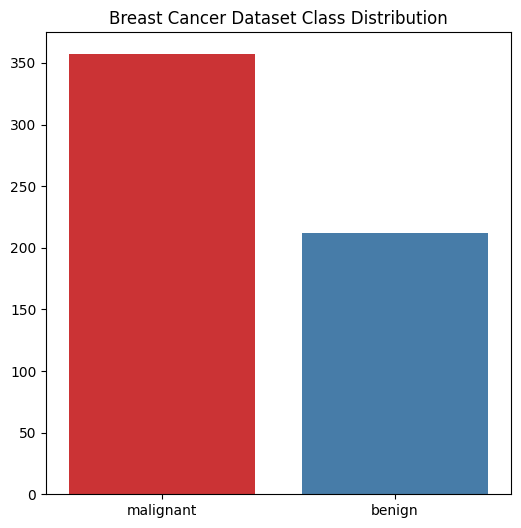

0    357
1    212
Name: Label, dtype: int64


In [25]:
# class 분포 확인

## 1. 시각적으로 확인
plt.figure(figsize=(6,6))
sns.barplot(x=dataset.target_names, y=df.Label.value_counts().values, palette='Set1')
plt.title("Breast Cancer Dataset Class Distribution")
plt.show()

## 2. 실제 값 확인
print(df['Label'].value_counts())   # 카테고리 형 값이 담긴 변수의 경우, 해당 변수 내에서 각 카테고리 값이 몇 개나 들어있는지 count해주는 메서드

#### Insights from class distribution
- 569개 샘플 중 212개 (37%)는 악성, 357개(63%)는 양성
- 불균형이 아주 크지 않음

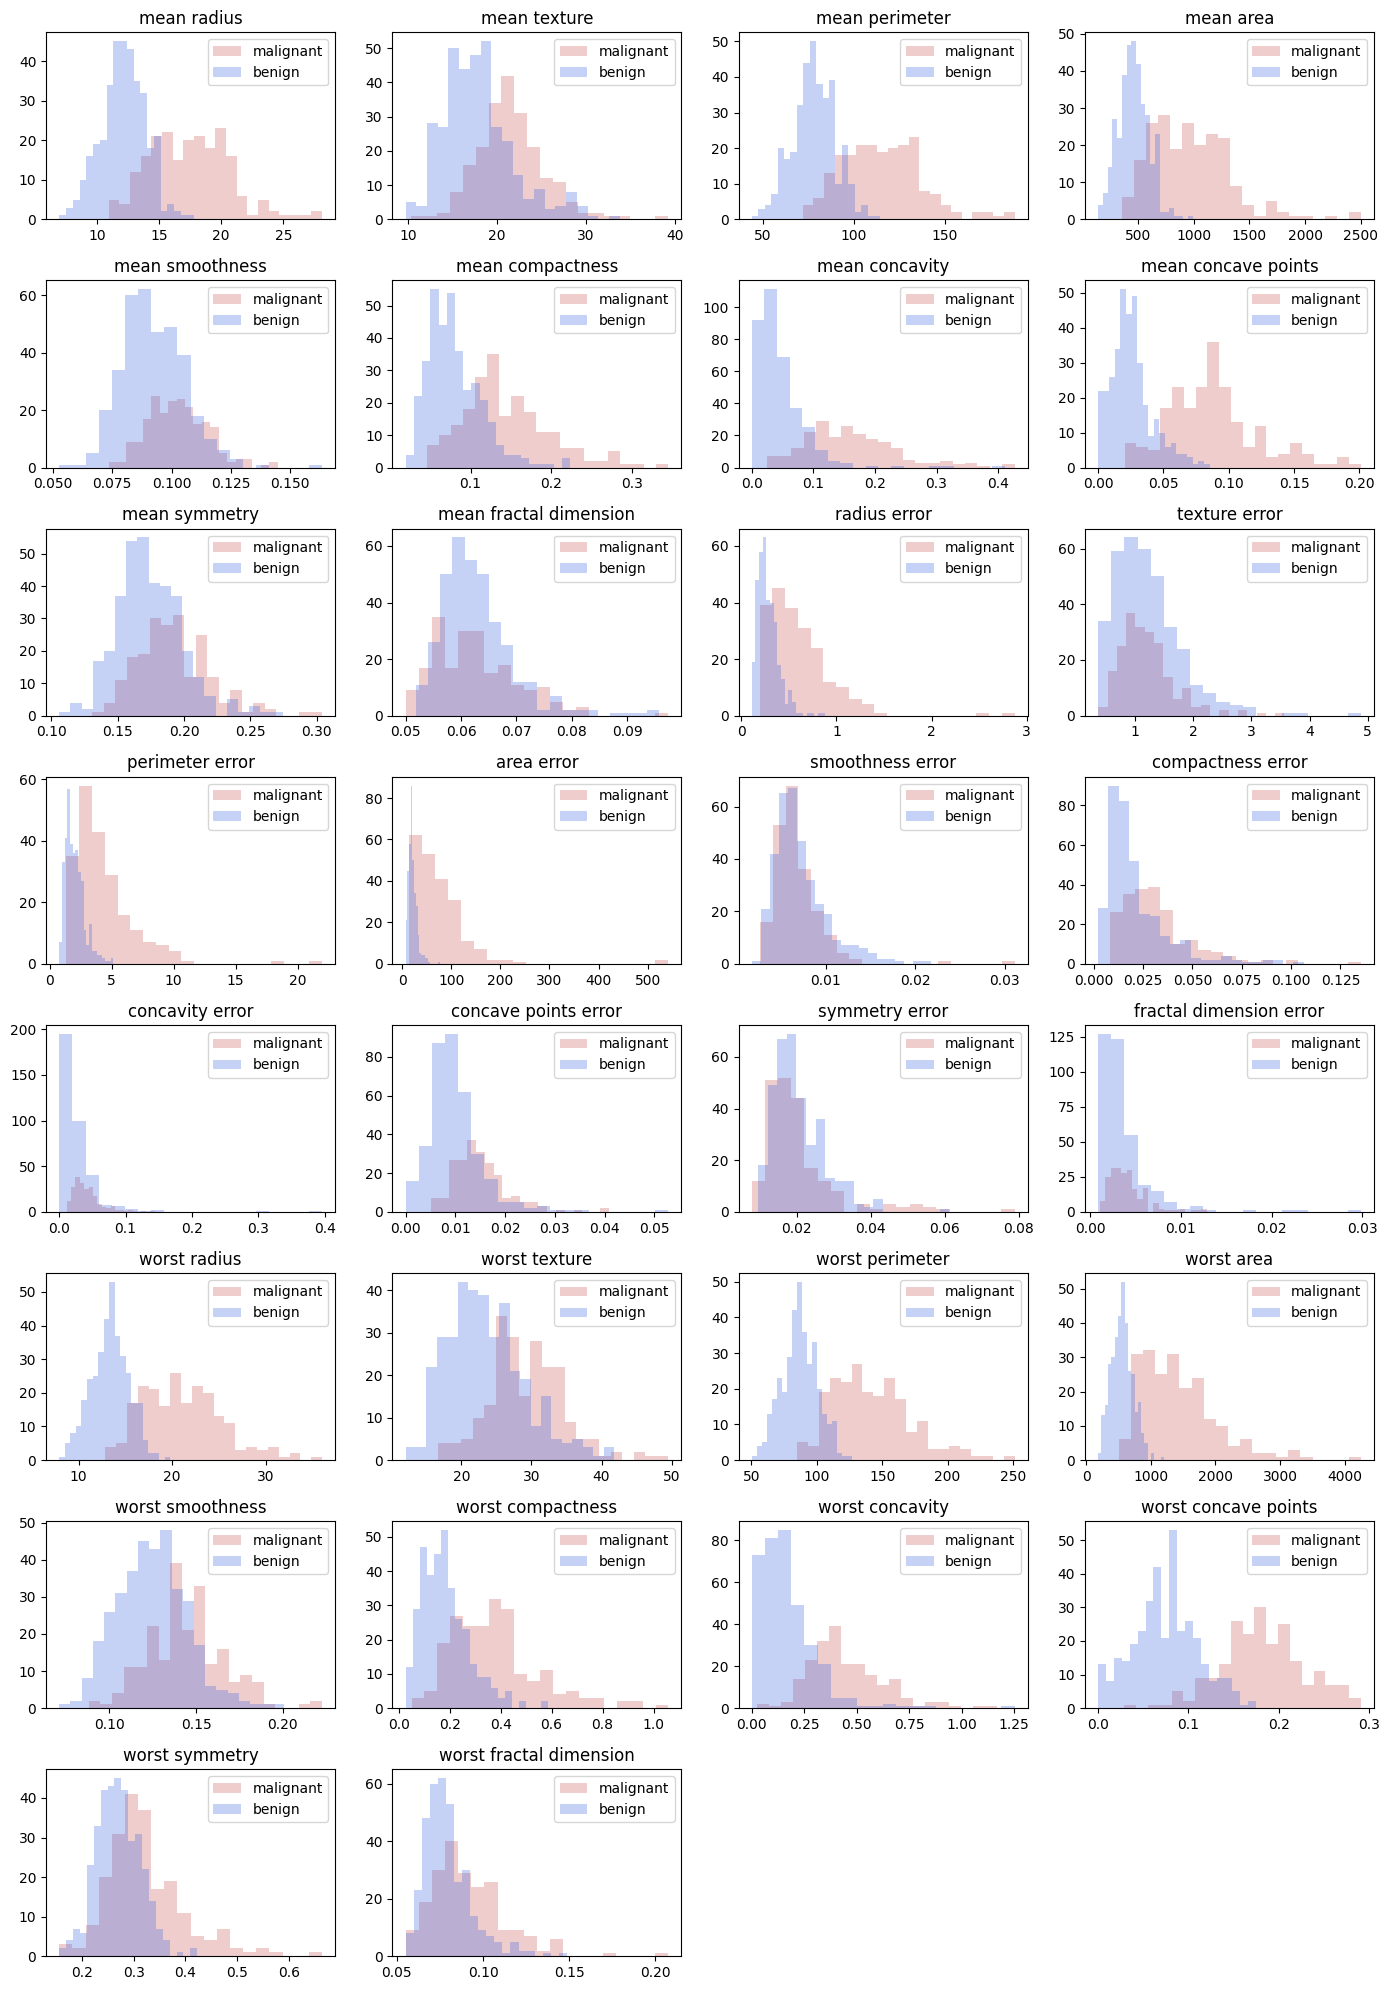

In [26]:
# label 별로 X 입력변수의 분포가 다른지 확인
## y를 구분할 수 있는 정도로 X가 뚜렷하게 다른지를 선행적으로 파악

plt.figure(figsize=[14,20])
for col in range(len(dataset.feature_names)):
    plt.subplot(8,4,col+1)  # 32개의 그래프 중 col번째 그래프 그리기
    plt.hist(malignant_data.iloc[:,col],bins=20, alpha=0.3, color='indianred') # 막대 너비 = 전체 구간을 bins=20으로 나누어 준 너비, alpha 는 투명도(0~1)를 조절
    plt.hist(benign_data.iloc[:,col], bins=20 ,alpha=0.3, color='royalblue')
    plt.title(dataset.feature_names[col])
    plt.legend(dataset.target_names)
    plt.tight_layout()

#### Insights
- 악성(Malignant)과 양성(Benign)의 분포 차이가 뚜렷한 변수 존재
    - `mean radius`, `mean perimeter`, `mean area`, `mean concavity`, `mean concave points` 등의 변수에서 악성과 양성이 뚜렷한 분포 차이를 보임
    - 악성 종양은 일반적으로 더 크고 불규칙한 형태를 가지며, 양성 종양은 크기가 작고 규칙적인 형태를 띔  

- 대부분의 변수에서 악성 종양(Malignant)의 값이 더 큼
    - 특히 'worst'로 시작하는 변수들은 악성 종양에서 훨씬 큰 값을 가짐
    - 악성 종양이 성장하며 더 넓은 영역을 차지하고 모양이 더 불규칙해지는 특징을 반영했음을 추론 가능
    - 이런 변수들이 label을 구분하는 데 있어 중요한 역할을 할 가능성이 높음  
    
- 일부 변수는 클래스 간 차이가 미미함
    - `mean smoothness`, `mean symmetry`,` mean fractal dimension` 같은 변수들은 악성과 양성 사이에서 분포가 크게 다르지 않음
    - 모델을 만들 때, 이러한 변수들은 상대적으로 덜 중요한 특징으로 고려될 수 있음  

- 데이터 정규화 필요성
    - `mean area`, `worst area` 등 몇몇 변수는 값의 스케일이 크기 때문에, 이를 다른 변수와 맞춰주는 과정이 필요함

#### 데이터 전처리

- Train, Test set 나누는 과정이 선행되어야 함
- 데이터 Scaling 작업

    [Scaler  종류]
    
|종류|설명|수식|특징|
|:------:|:---:|:---:|:---:|
|StandardScaler|평균과 표준편차 사용|$$ {X-\mu} \over  \sigma $$|이상치에 민감|
|MinMaxScaler|최대/최소값이 각각 1, 0이 되도록 스케일링|$$ {X-X_{min}} \over  {X_{max}-X_{min}} $$|이상치에 민감|
|RobustScaler|중앙값(median)과 IQR(interquartile range) 사용|$$ {X-X_{median}} \over  {IQR} $$|이상치에 덜 민감|

In [27]:
# 데이터 분할: train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, # 분할할 데이터 입력
                                                    test_size=0.2, # test size: float, 전체 20%를 test 80%를 train으로 활용
                                                    random_state=0) # 데이터 랜덤 분할. 랜덤성 제어를 위해서 임의 값으로 고정

print(f'학습 데이터 형태:   {X_train.shape}')
print(f'테스트 데이터 형태: {X_test.shape}')

학습 데이터 형태:   (455, 30)
테스트 데이터 형태: (114, 30)


In [28]:
# scaler 정의
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)  # scaler를 X_train 분포에 적합(fit)시킨 뒤, 변형 (transform)
X_test_scaled = scaler.transform(X_test)  # 학습 데이터 통계량에 적합된 scaler를 이용해 X_test를 변형 (transform)

In [29]:
# 분석/실습 용이성을 위해서 다시 데이터프레임으로 재변환
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaler.get_feature_names_out())  # get_feature_names_out()으로 기존 변수 명을 받을 수 있음
X_test_scaled = pd.DataFrame(X_test_scaled, columns=scaler.get_feature_names_out())

X_train_scaled

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       0.145251      0.324481        0.142492   0.070965         0.522103   
1       0.180747      0.509129        0.172759   0.091792         0.384273   
2       0.433480      0.213693        0.418147   0.278473         0.459650   
3       0.246060      0.337344        0.234953   0.130477         0.563376   
4       0.249373      0.528216        0.237648   0.137010         0.318128   
..           ...           ...             ...        ...              ...   
450     0.559847      0.426141        0.532859   0.406575         0.397524   
451     0.259312      0.594606        0.277659   0.140997         0.716520   
452     0.116191      0.357261        0.110773   0.057306         0.524275   
453     0.129632      0.353112        0.117062   0.061336         0.183230   
454     0.214350      0.590041        0.212356   0.110286         0.434235   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.184508        0.058833             0.088221       0.419192   
1            0.130299        0.084677             0.069781       0.482828   
2            0.224745        0.128866             0.225050       0.340909   
3            0.175296        0.058341             0.146173       0.424242   
4            0.111705        0.040159             0.062674       0.244444   
..                ...             ...                  ...            ...   
450          0.135128        0.187910             0.290408       0.247475   
451          0.754126        0.532568             0.424602       0.489899   
452          0.137593        0.063496             0.069881       0.225253   
453          0.013903        0.000000             0.000000       0.299495   
454          0.283268        0.260544             0.204026       0.165657   

     mean fractal dimension  ...  worst radius  worst texture  \
0                  0.281171  ...      0.114906       0.394989   
1                  0.206613  ...      0.171825       0.533582   
2                  0.185131  ...      0.347919       0.201493   
3                  0.345198  ...      0.174315       0.237207   
4                  0.206403  ...      0.221985       0.532249   
..                      ...  ...           ...            ...   
450                0.000000  ...      0.427962       0.327292   
451                0.683867  ...      0.254714       0.763859   
452                0.413437  ...      0.145500       0.346482   
453                0.305602  ...      0.072501       0.234808   
454                0.331508  ...      0.161864       0.670043   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0           0.107426    0.048860          0.455854           0.109546   
1           0.165745    0.074789          0.390477           0.138070   
2           0.326162    0.187451          0.326421           0.140592   
3           0.158026    0.076190          0.282837           0.064315   
4           0.210817    0.107575          0.359440           0.148548   
..               ...         ...               ...                ...   
450         0.391404    0.258258          0.350855           0.086067   
451         0.235271    0.129326          0.753682           1.000000   
452         0.126401    0.062525          0.410289           0.075298   
453         0.058967    0.029149          0.000000           0.000000   
454         0.158723    0.071028          0.387176           0.217724   

     worst concavity  worst concave points  worst symmetry  \
0           0.084265              0.223872        0.261975   
1           0.153914              0.257837        0.275971   
2           0.184505              0.388908        0.239109   
3           0.039776              0.202618        0.130495   
4           0.098243              0.218223        0.302582   
..               ...                   ...             ...   
450         0.176518              0.445746        0

### 3. 모델 정의

`로지스틱 회귀 (Logistic Regression)`
- `sklearn`에서 제공하는 Logistic Regression 이용

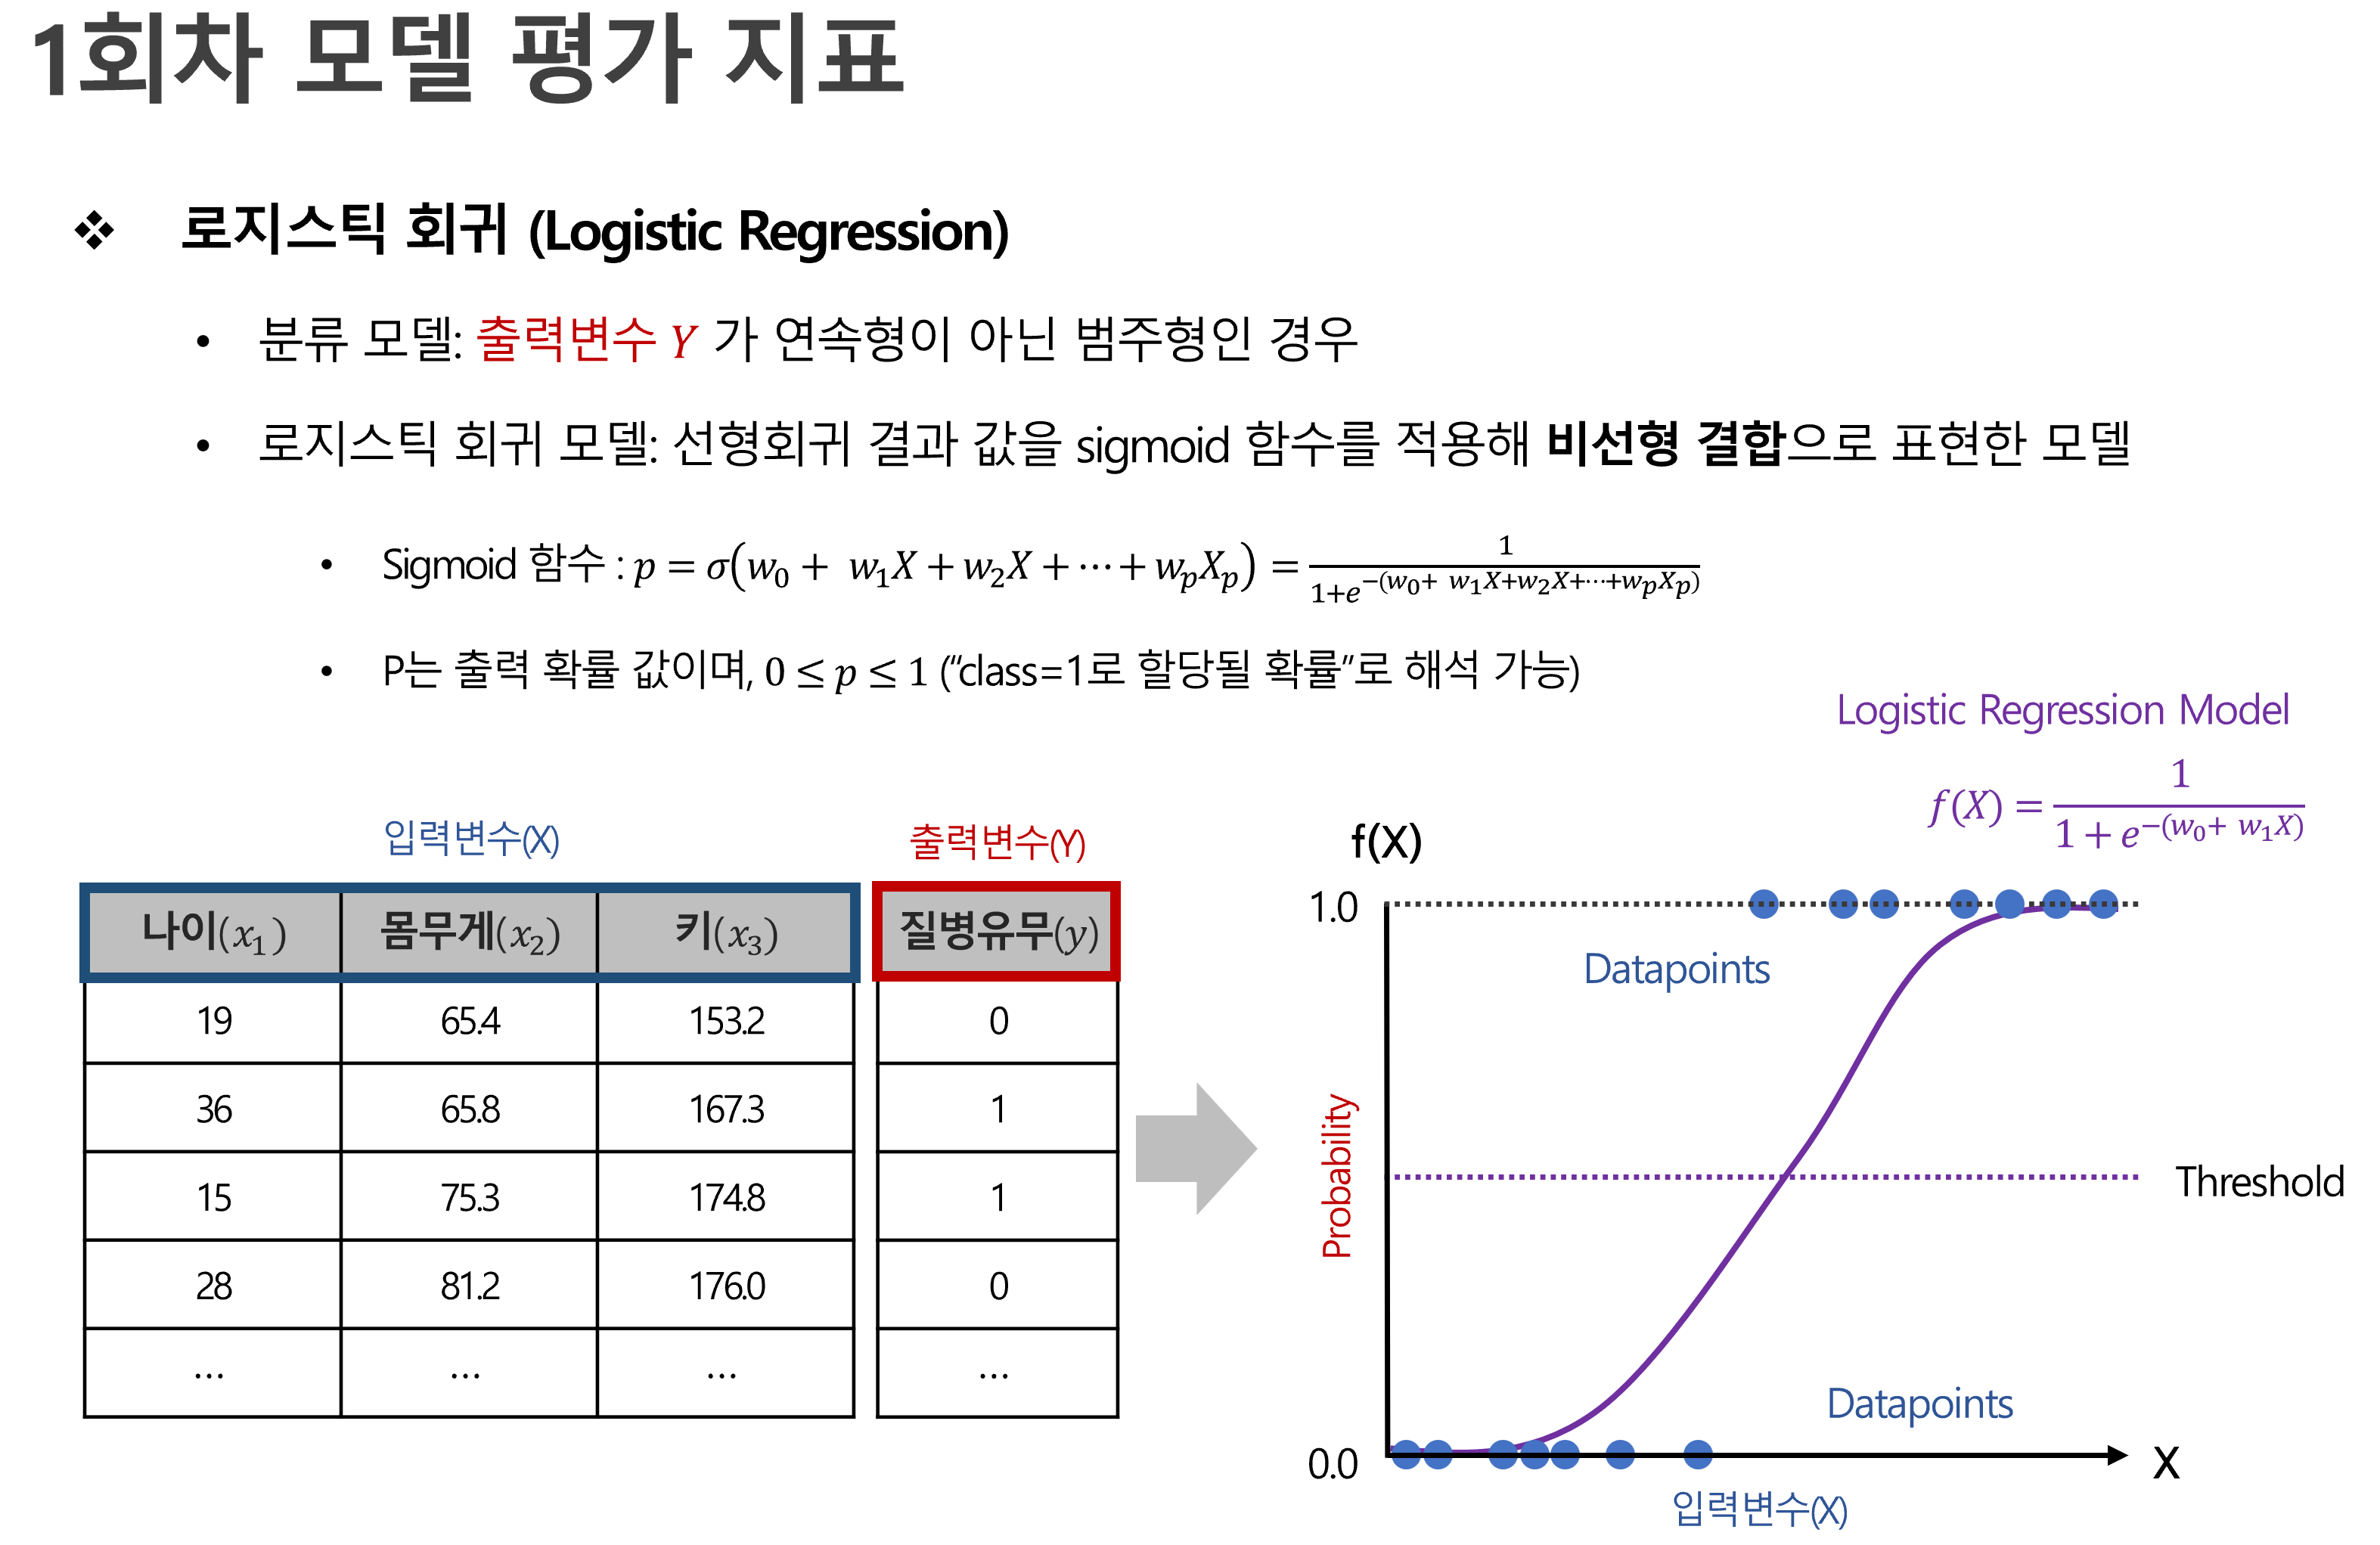

In [30]:
Image('./images/logistic-reg.png')

In [31]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
logistic_regression = LogisticRegression()

### 4. 모델 학습 (Train set)
- 일반적으로 `sklearn` 등에서 제공하는 머신러닝 모델은 `fit()` 메서드를 통해서 모델 학습 가능 (최적 파라미터 자동 탐색)
    - 딥러닝 모델은 사용자가 직접 학습 가능하게끔 훈련 코드를 별도로 작성해야 함

In [32]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

### 5. 모델 적용 (Test set)
- 모델 훈련 과정에서 사용하지 않았던 새로운 데이터를 이용해 예측 수행
- 모의고사를 통해 훈련한 모델이 수능을 보는 것

In [33]:
y_pred = logistic_regression.predict(X_test)

In [34]:
pred_info = pd.concat([y_test, pd.DataFrame(y_pred, index=y_test.index)], axis=1)
pred_info.columns = ['y_true', 'y_pred']
pred_info.head(10)

y_true  y_pred
512       1       1
457       0       0
439       0       0
298       0       0
37        0       0
515       0       0
382       0       0
310       0       0
538       0       0
345       0       0

### 6. 이진 분류 모델 성능 평가
**분류 모델이 얼마나 정확하게 분류하였는지 평가** 필요

#### Confusion Matrix (혼동 행렬)
- 분류 모델의 예측 결과를 실제 값과 비교하여 4가지 경우로 분류하는 행렬  

| 실제 값 ↓ / 예측 값 →	| 예측: 1 (Positive) |	예측: 0 (Negative) |
| --- | --- | --- |
|**실제 1 (Positive)** |	TP (True Positive) → 실제 1을 1로 예측 |	FN (False Negative) → 실제 1을 0으로 예측 (오류) |
|**실제 0 (Negative)** |	FP (False Positive) → 실제 0을 1로 예측 (오류) |	TN (True Negative) → 실제 0을 0으로 예측 |

- TP (True Positive, 진짜 양성): 실제 값이 1인데, 모델이 1로 정확하게 예측
- TN (True Negative, 진짜 음성): 실제 값이 0인데, 모델이 0으로 정확하게 예측  

- FP (False Positive, 거짓 양성): 실제 값이 0인데, 모델이 1로 잘못 예측 (제1종 오류, Type I Error)
- FN (False Negative, 거짓 음성): 실제 값이 1인데, 모델이 0으로 잘못 예측 (제2종 오류, Type II Error)

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix 생성
true, pred = pred_info['y_true'], pred_info['y_pred']
cm = confusion_matrix(y_true=true, y_pred=pred)
print(cm)  
"""
기본적인 순서는
0 1
1 0
로, 0이 먼저 나오도록 설정됨
"""

[[63  4]
 [ 2 45]]


'\n기본적인 순서는\n0 1\n1 0\n로, 0이 먼저 나오도록 설정됨\n'

In [36]:
true, pred = pred_info['y_true'], pred_info['y_pred']
cm = confusion_matrix(y_true=true, y_pred=pred, 
                      labels=[1, 0]  # 라벨 순서를 1 → 0으로 변경
                      )
print(cm)

[[45  2]
 [ 4 63]]


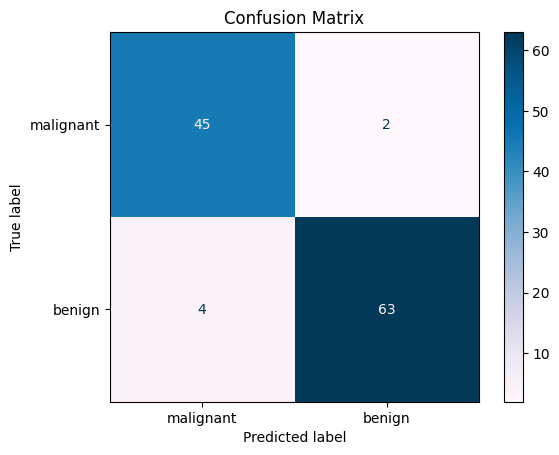

In [37]:
# confusion matrix 시각화 방식 - 1
cm_display = ConfusionMatrixDisplay(cm, 
                                    display_labels=['malignant', 'benign'])
cm_display.plot(cmap='PuBu')
plt.title("Confusion Matrix")
plt.show();

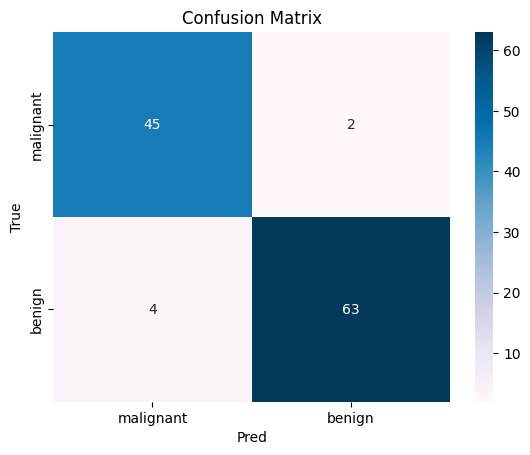

In [38]:
# confusion matrix 시각화 방식 - 2
sns.heatmap(cm, annot=True, cmap='PuBu', 
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### 6-2. **정량적인 지표를 이용**하여서 객관적으로 평가해보자!
- TP, TN, FP, FN을 기반으로 모델 성능을 다양한 관점에서 (다양한 성능지표) 정의 가능

#### **Accuracy (정확도)**
- $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$
- 모든 예측 중에서 맞춘 (TP, TN) 비율
- 단점: class 불균형이 있는 경우에는 해석이 어려움

In [39]:
TP, FN, FP, TN = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

accuracy = (TP+TN)/(TP+FN+FP+TN)

print(f'정확도: {100*accuracy:.2f}%')

정확도: 94.74%


#### **Misclassification Rate, Error Rate (오분류율)**

- $Error Rate=1-Accuracy=\frac{FP+FN}{TP+TN+FP+FN}$
- 모든 예측 중에서 잘못된 예측 (FP, FN) 비율
- 단점: 정확도와 마찬가지로, class 불균형이 있는 경우 해석이 어려움

In [40]:
error_rate = 1-accuracy
print(f'오분류율: {100*(1-accuracy):.2f}%')

오분류율: 5.26%


#### **Sensitivity, Recall, TPR (민감도)**

- $Recall=\frac{TP}{TP+FN}$
- **실제** 양성(class=1) 데이터 중에서 모델이 실제 class=1이라고 예측한 비율
- FN (거짓 음성)을 줄이는 것이 중요한 경우, 특히 질병 진단에서 중요 (e.g., 암 환자 진단에서 실제 환자를 놓치면 안 됨)
- FP를 고려하지 않음

In [41]:
recall = TP/(TP+FN)
print(f"재현율: {recall:.2f}")

재현율: 0.96


#### **Specificity, TNR (특이도)**
- $Specificity=\frac{TN}{TN+FP}$
- **실제** 음성(class=0)인 데이터 중에서 모델이 0이라고 예측한 비율
    - special case of `Recall` (same type of calculation but for the actual negative class)
- FP (거짓 양성)를 줄이는 것이 중요한 경우, 즉, class=0 인 경우에서의 정확도를 최대화 (e.g., 유죄 판결)

In [42]:
specificity = TN/(TN+FP)
print(f"특이도: {specificity:.2f}")

특이도: 0.94


#### **Precision, PPV (정밀도)**

- $Precision=\frac{TP}{TP+FP}$
- **모델이** 양성 (class=1)이라 **예측**한 데이터 중에서 실제 class=1이라고 예측한 비율
- FP (거짓 양성)를 줄이는 것이 중요한 경우, 즉, class=1이라 잘못 예측하는 비율을 줄이고 싶을 때 (e.g., 스팸 필터에서 정상 메일을 스팸으로 분류하면 안 됨)
- FN을 고려하지 않음

In [43]:
precision = TP/(TP+FP)
print(f"정밀도: {precision:.2f}")

정밀도: 0.92


#### **F1 Score (정밀도와 민감도의 조화 평균)**

- $F1=\frac{2 \times{Precision}\times{Recall}}{Precision+Recall}$
- Precision과 Recall을 균형 있게 고려한 지표
- class 불균형이 있는 경우, Accuracy 대신 사용하기에 적절한 지표! (성능을 보다 균형있게 평가)
    - 만일 class=0이 95%, class=1이 5%인 불균형 문제라 할 때, 모든 class를 0으로 예측해도 accuracy는 95%가 됨 (우수한 성능처럼 보임)
    - 하지만 이 모델은 실제로는 class=1 (본 실습에서는 실제로 암이 있는 환자)를 거의 검출하지 못하는 문제 (FN↑)를 가짐 → 이러한 경우에 정확도; accuracy는 신뢰할 수 없는 지표
    - F1 score는 class=1인 데이터가 적더라도, class=1을 얼마나 class=1로 잘 분류했는지를 평가하는 두 지표인 Precision과 Recall을 동시에 고려하기에 모델 성능을 보다 공정하게 평가 가능

In [44]:
f1 = (2*precision*recall)/(precision+recall)
print(f"F1 점수: {f1:.2f}")

F1 점수: 0.94


#### **`sklearn`에서 제공해주는 라이브러리 이용하기**
- 모델 성능 평가를 자동으로 계산해주는 라이브러리를 이용해 손쉽게 모델 성능 평가 가능
- 일반적으로는 `Accuracy`, `F1-Score`를 가장 많이 사용
- 좀 더 세부적으로 보고자 할 때, `Recall`, `Precision`도 함께 성능 평가

In [48]:
pred_info.head()

y_true  y_pred
512       1       1
457       0       0
439       0       0
298       0       0
37        0       0

In [49]:
true, pred = pred_info['y_true'], pred_info['y_pred']

In [50]:
# 관련 모듈 불러오기
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [51]:
# Accuracy
sklearn_acc = 100*accuracy_score(y_true=true, y_pred=pred)
sklearn_acc

94.73684210526315

In [52]:
# 직접 구한 지표와 내장 함수 간의 차이 비교
print(f"{100*accuracy:.2f}% = {100*accuracy_score(y_true=true, y_pred=pred):.2f}%")

94.74% = 94.74%


In [53]:
# Missclassification Rate / Error Rate
sklearn_error_rate = 1-accuracy_score(true, pred)
print(f'오분류율: {100*(1-accuracy_score(true, pred)):.2f}%')

오분류율: 5.26%


In [54]:
# Recall, Precision
sklearn_recall = recall_score(y_true=true, y_pred=pred)
sklearn_precision = precision_score(true, pred)

print(f"재현율: {sklearn_recall:.2f}")
print(f"정밀도: {sklearn_precision:.2f}")

재현율: 0.96
정밀도: 0.92


In [55]:
# f1-score
sklearn_f1 = f1_score(y_true=true, y_pred=pred, average='binary')

print(f"F1 점수: {sklearn_f1:.2f}")

F1 점수: 0.94


----

#### **Threshold (기준점) 설정**
- 분류 모델은 출력 값으로 특정 class에 속할 **확률 값**을 출력
- `predict_proba()`를 사용하면 각 샘플이 class=0 또는 class=1일 확률을 반환

In [57]:
model_prob = logistic_regression.predict_proba(X_test)  # 각각 class=0 / class=1에 속할 확률을 도출
model_prob

array([[9.94784252e-03, 9.90052157e-01],
       [9.71091905e-01, 2.89080953e-02],
       [9.97580881e-01, 2.41911907e-03],
       [8.05156425e-01, 1.94843575e-01],
       [9.99848826e-01, 1.51173775e-04],
       [9.97401965e-01, 2.59803482e-03],
       [9.94732658e-01, 5.26734239e-03],
       [9.97731775e-01, 2.26822489e-03],
       [9.86111759e-01, 1.38882411e-02],
       [9.99577368e-01, 4.22631642e-04],
       [5.45188083e-01, 4.54811917e-01],
       [8.82864659e-01, 1.17135341e-01],
       [9.96968179e-01, 3.03182071e-03],
       [1.29763145e-01, 8.70236855e-01],
       [8.29258756e-01, 1.70741244e-01],
       [6.30349481e-03, 9.93696505e-01],
       [9.91325735e-01, 8.67426507e-03],
       [2.26380803e-09, 9.99999998e-01],
       [1.11794481e-03, 9.98882055e-01],
       [3.29847261e-12, 1.00000000e+00],
       [4.51123996e-05, 9.99954888e-01],
       [1.08055119e-01, 8.91944881e-01],
       [9.98096919e-01, 1.90308075e-03],
       [9.89352646e-01, 1.06473545e-02],
       [4.397113

In [58]:
# 첫 번째 샘플은 class=1일 확률이 98.96%
print(f"첫 번째 샘플 모델 예측 확률: {model_prob[0,:]} | 첫 번째 샘플 예측 class: {pred.iloc[0]}")

# 두 번째 샘플은 class=1일 확률이 2.90% (class=0일 확률 97.10%)
print(f"두 번째 샘플 모델 예측 확률: {model_prob[1,:]} | 두 번째 샘플 예측 class: {pred.iloc[1]}")

첫 번째 샘플 모델 예측 확률: [0.00994784 0.99005216] | 첫 번째 샘플 예측 class: 1
두 번째 샘플 모델 예측 확률: [0.9710919 0.0289081] | 두 번째 샘플 예측 class: 0


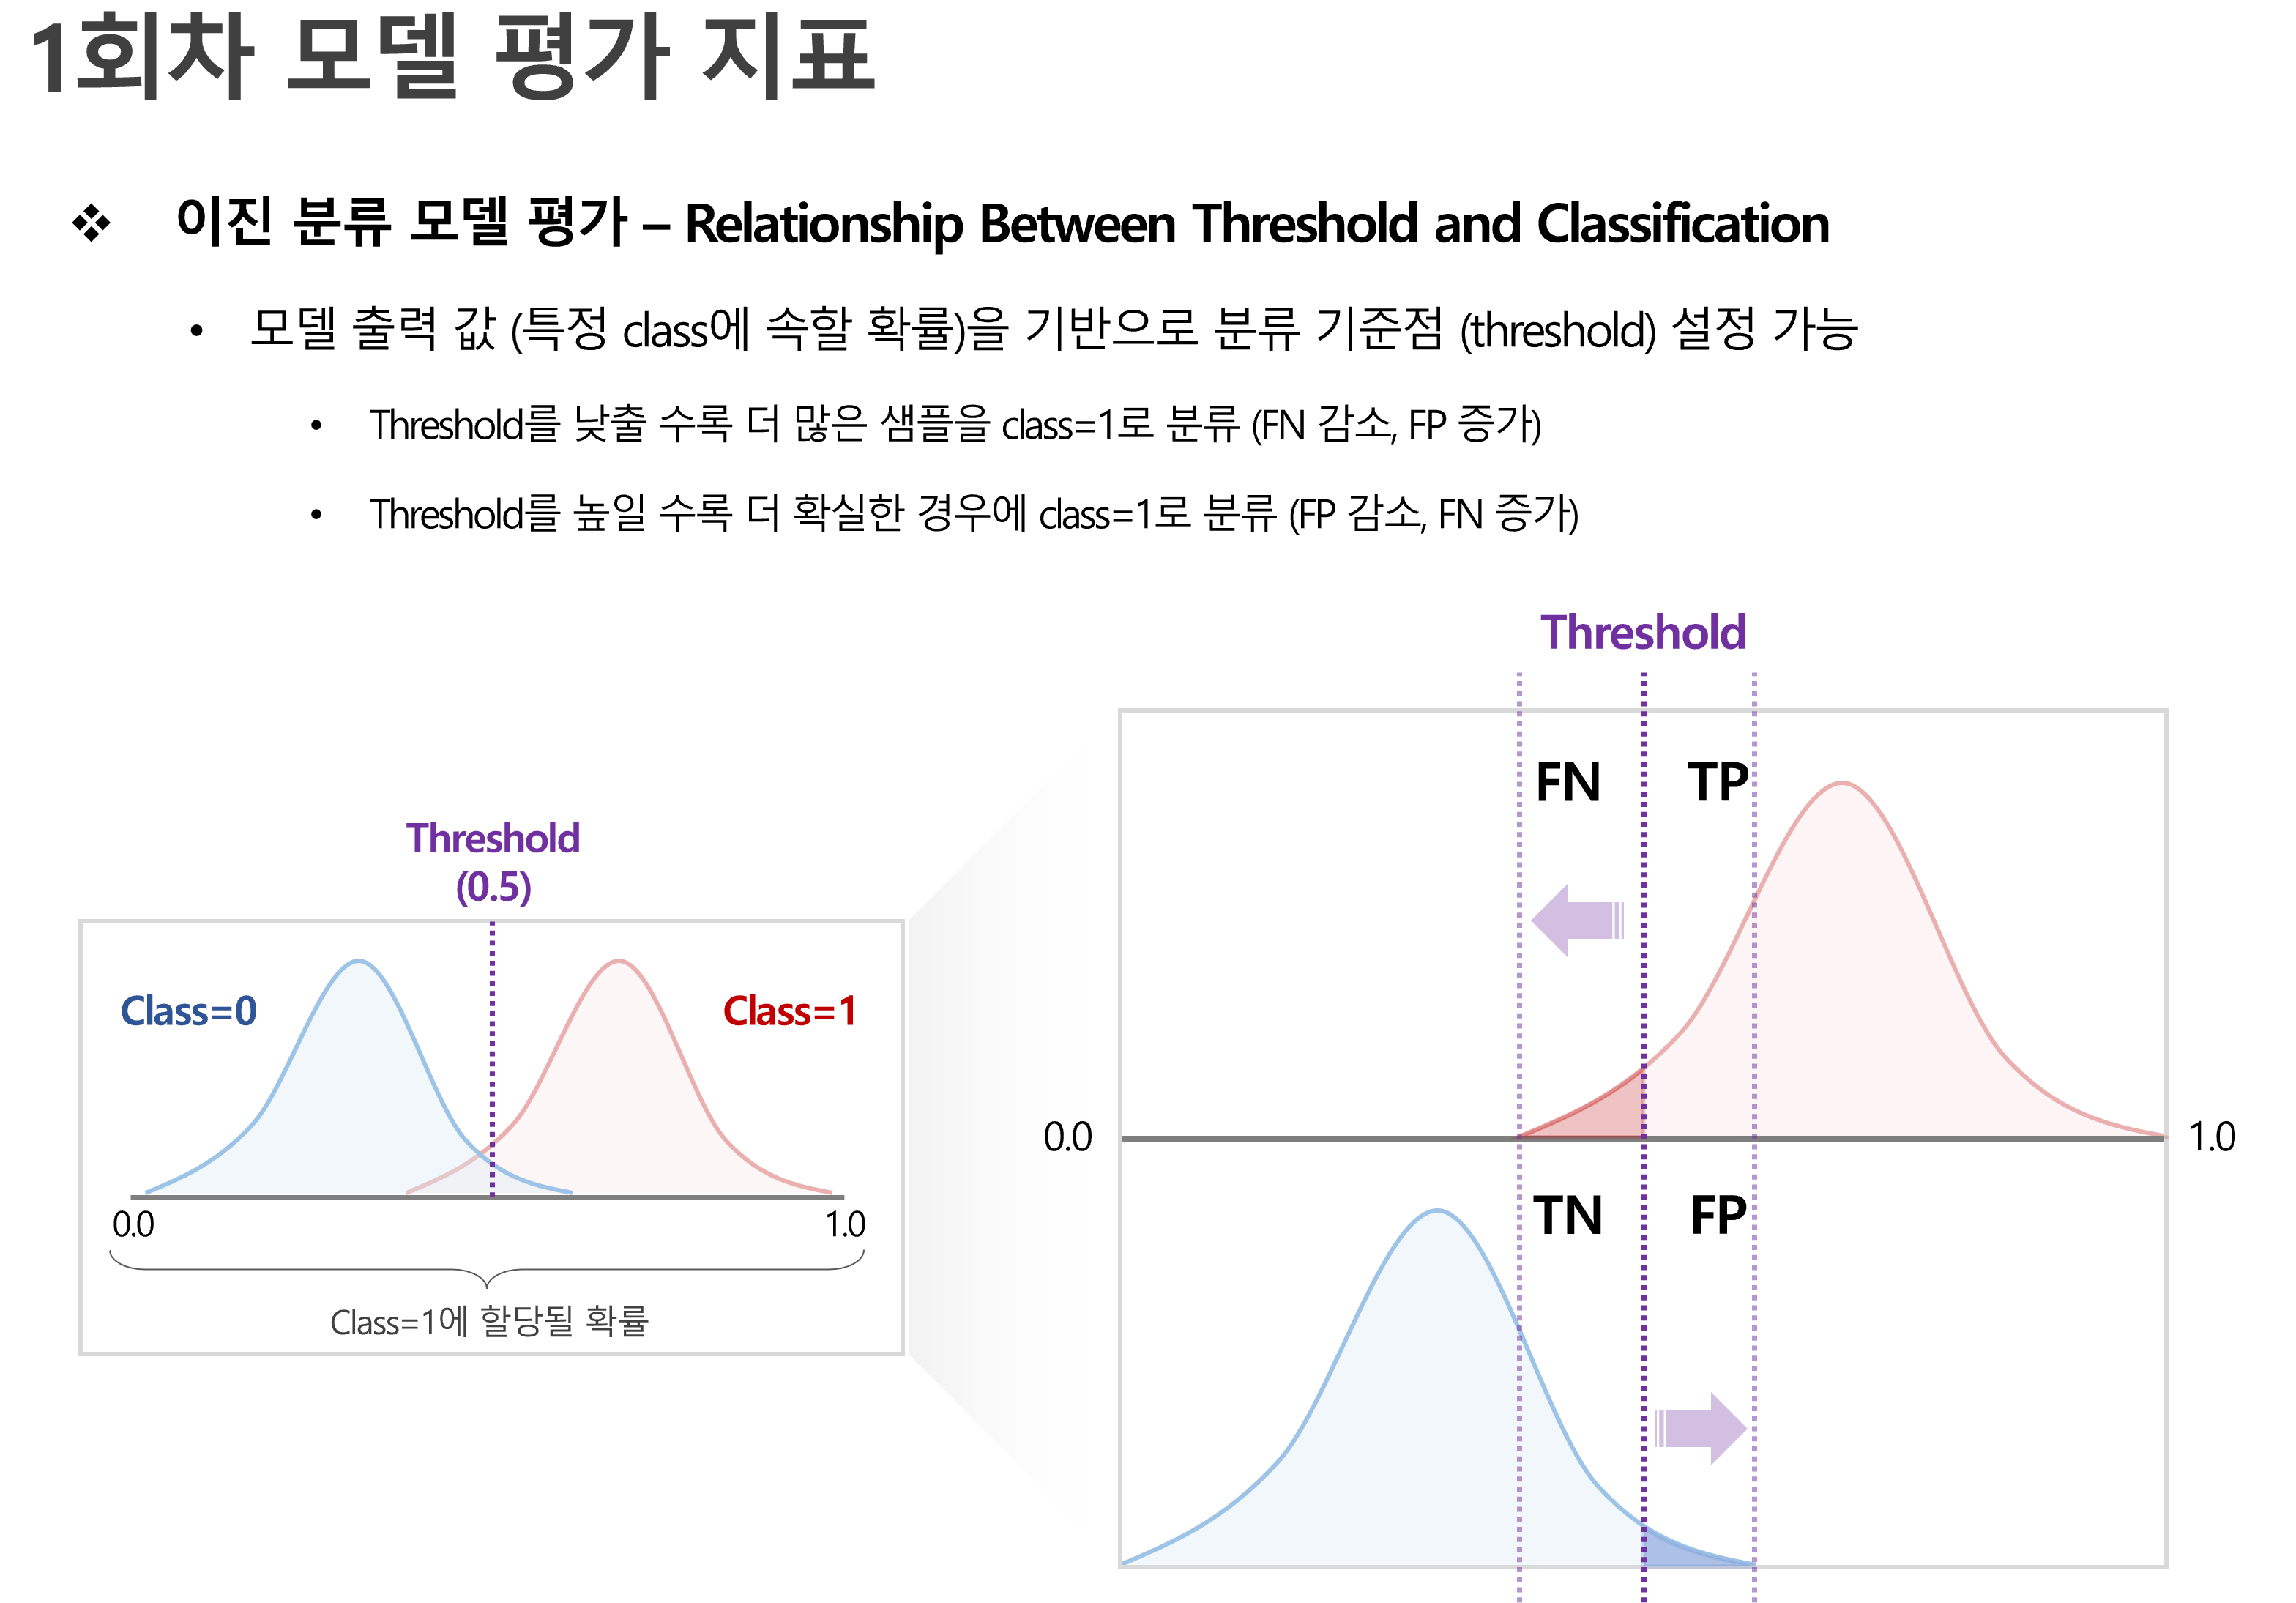

In [59]:
Image('./images/binary-cutoff.png')

- 이 Threshold를 기준으로 class가 1인지, 0인지 결정 가능
    - Threshold ↑ : Precision 증가, Recall 감소 (보수적인 예측)
    - Threshold ↓ : Recall 증가, Precision 감소 (포괄적인 예측)
- 임계 값은 0.5를 기본으로 두되, task 특수성에 맞게 precision-recall tradeoff를 고려해 최적화 필요

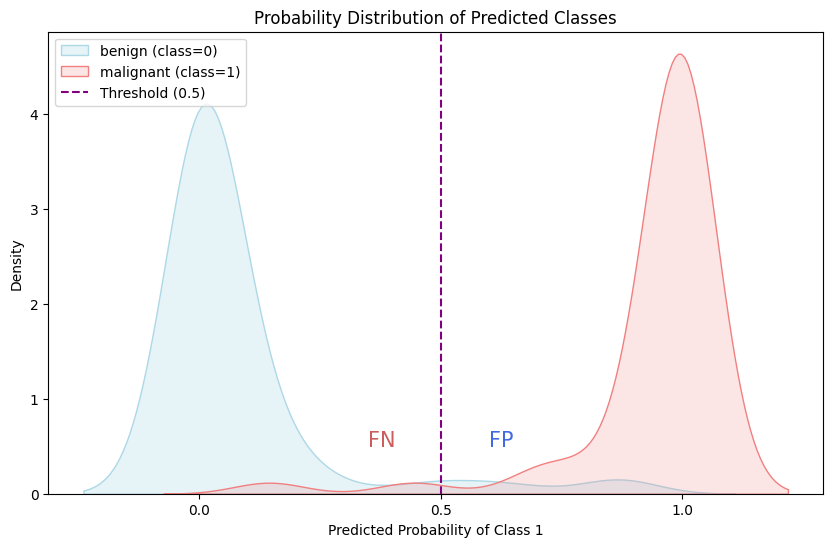

In [60]:
# 실제 데이터로 확인해보기

probs = logistic_regression.predict_proba(X_test)[:,1]  # class 1일 확률만 가져오기
# 실제 class 별 확률 값 분포 (cf. kde 확률 밀도 추정 시 실제 데이터 범위를 벗어난 부분에 대해서 외삽 수행하는 특성)
plt.figure(figsize=(10,6))
sns.kdeplot(probs[true==0], fill=True, color='lightblue', alpha=0.3, label='benign (class=0)')
sns.kdeplot(probs[true==1], fill=True, color='lightcoral', alpha=0.2, label='malignant (class=1)')

# threshold
threshold = 0.5
plt.axvline(threshold, color='purple', linestyle='--', label="Threshold (0.5)")

# 그래프 설정
plt.xticks([0, 0.5, 1])
plt.xlabel("Predicted Probability of Class 1")
plt.ylabel("Density")
plt.title("Probability Distribution of Predicted Classes")
plt.legend(loc='upper left')
plt.text(x=0.6, y=0.5, s="FP", fontsize=15, color='royalblue')
plt.text(x=0.35, y=0.5, s="FN", fontsize=15, color='indianred')
plt.show()

#### **False Positive Rate, Type 1 Error (FPR, 제1종 오류)**
- $FPR=\frac{FP}{FP+TN}=1-Specificity$
- 실제는 class=0인데 class=1로 잘못 예측하는 비율
- 엄밀한 판단이 중요한 경우 최소화 필요 (e.g., 결백한 사람을 유죄로 판단하면 안 됨)

In [61]:
fpr = FP/(FP+TN)
print(f"FPR, 제1종 오류: {100*fpr:.2f}%")

FPR, 제1종 오류: 5.97%


#### **False Negative Rate, Type 2 Error (FNR, 제2종 오류)**
- $FNR=\frac{FN}{FN+TP}=1-Recall$
- 실제 class=1인데 class=0으로 잘못 예측하는 비율
- 의료 진단 등 최대한 양성을 잡아내야 하는 보수적인 판단이 필요한 경우 최소화 필요 (e.g., 암 환자를 음성으로 판정하면 안 됨)

In [62]:
fnr = FN/(FN+TP)
print(f"FNR, 제2종 오류: {100*fnr:.2f}%")

FNR, 제2종 오류: 4.26%


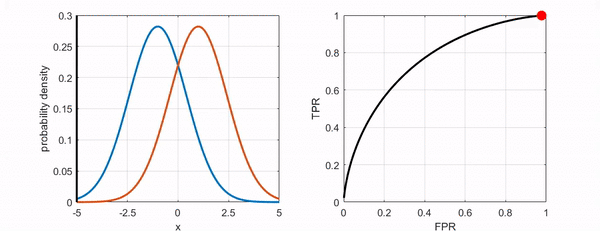

In [63]:
Image('./images/tpr-fpr.gif')

- 우리가 구축한 이진 분류 모델의 성능은 변하지 않지만, 가능한 모든 threshold가 변함에 따라 FPR, TPR의 성능이 변함
- 도메인 상황에 맞는 최적의 threshold가 무엇일지 고민 필요
- [그림 출처](https://angeloyeo.github.io/2020/08/05/ROC.html)

#### **AUC-ROC Score (ROC 곡선과 AUROC)**

##### **ROC 곡선 (Receiver Operating Characteristic Curve)**
- X축: False Positive Rate (FPR)
- Y축: True Positive Rate (TPR, Sensitivity)
- ROC 곡선이 좌상단에 가까울수록 좋은 모델

##### **AUC (Area Under the Curve)**
- ROC 곡선 아래 면적 (0 ~ 1 사이 값)
- AUC = 1 → 완벽한 분류기
- AUC = 0.5 → 랜덤 추측과 동일 (최악의 경우)
- AUC < 0.5 → 모델이 반대로 작동하는 경우 (오류)
- AUC-ROC는 Threshold에 관계없이 모델의 전반적인 성능을 평가하는 지표

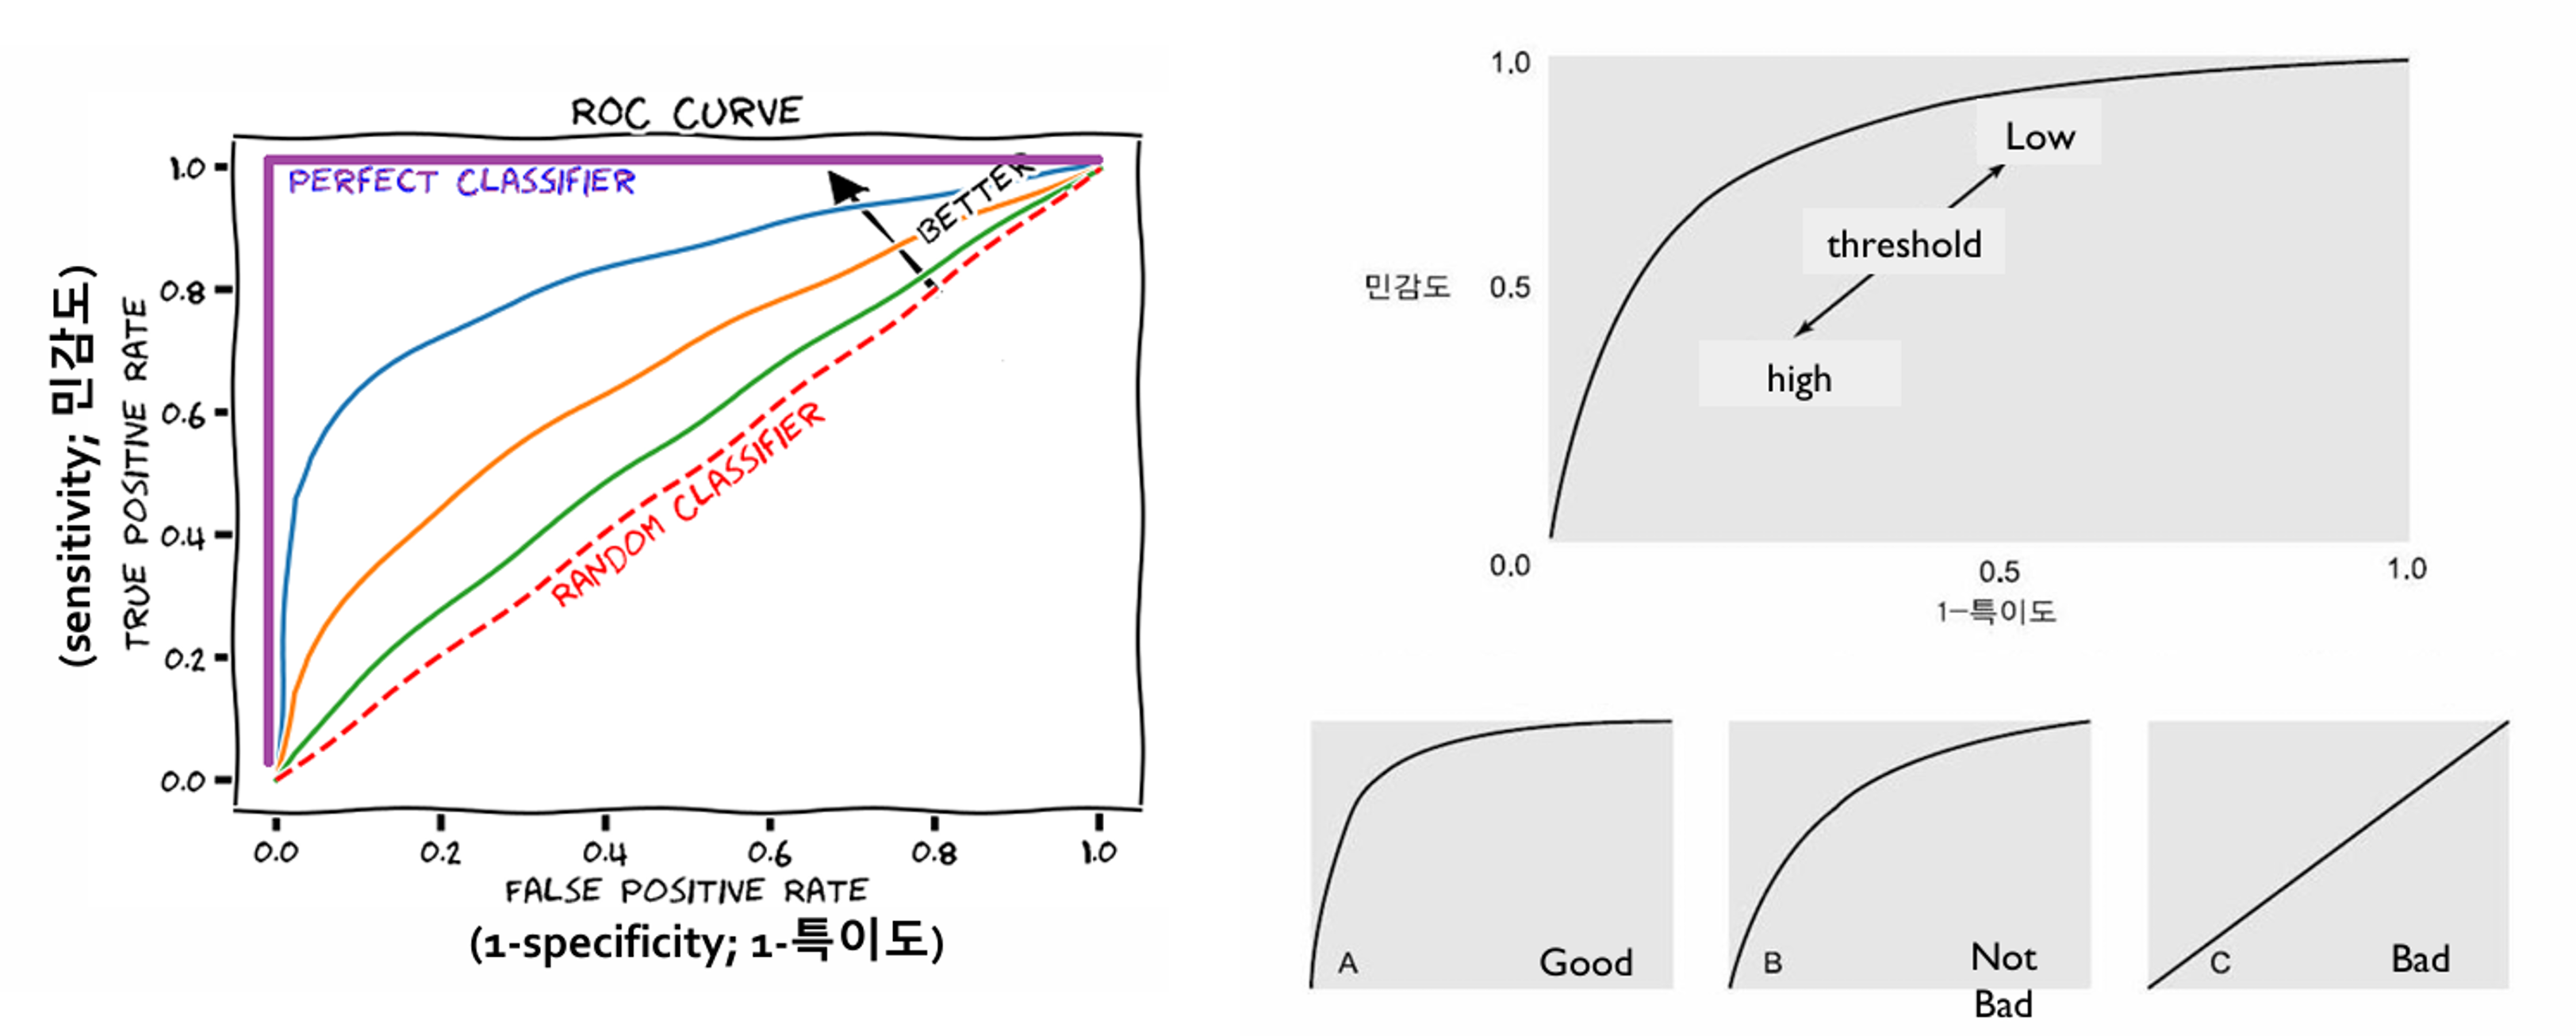

In [64]:
Image('./images/roc.png')

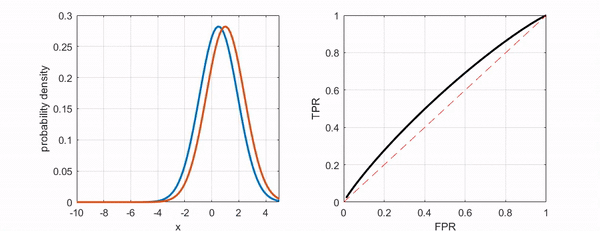

In [65]:
Image('./images/roc_.gif')

- 모델이 두 class를 잘 구별할 수 있다면 ROC 곡선은 좌상단에 더 가까워지게 되는 특성!

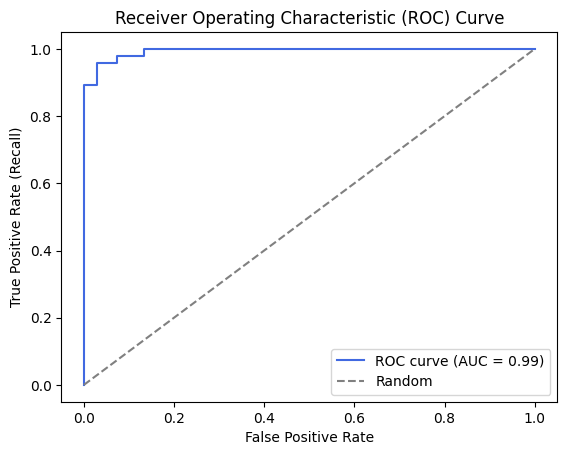

In [66]:
# ROC Curve and AUROC

from sklearn.metrics import roc_curve, auc

# 모델의 확률값 출력
y_prob = logistic_regression.predict_proba(X_test)[:, 1]

# FPR, TPR 계산
fpr, tpr, _ = roc_curve(y_test, y_prob)
auroc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='royalblue', label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')  # 랜덤 예측선 (무작위 분류기)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [67]:
# 0.5가 기준이지만, 상황에 맞게 threshold를 변경해가며 성능 변화 관찰

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

for i, cutoff in enumerate(thresholds):
    _y_pred = np.where(probs.reshape(-1)>=cutoff,1,0)          # 현재 threshold 적용하여 클래스 예측
    acc = accuracy_score(y_true=y_test, y_pred=_y_pred)        # 정확도
    recall = recall_score(y_true=y_test, y_pred=_y_pred)       # 민감도 (재현율)
    precision = precision_score(y_true=y_test, y_pred=_y_pred) # 정밀도

    auroc = auc(fpr[:i+1], tpr[:i+1]) if i>=1  else 0   # 데이터 포인트가 부족할 경우 AUROC=0 (계산을 위해 최소한 2개 이상의 데이터 포인트가 필요)
    
    print(f"threshold: {cutoff:.2f}", 
          f"Accuracy: {100*acc:.2f}%",
          f"Recall :{recall:.2f}",
          f"Precision :{precision:.2f}", 
          sep='  |  ')  

threshold: inf  |  Accuracy: 58.77%  |  Recall :0.00  |  Precision :0.00
threshold: 1.00  |  Accuracy: 60.53%  |  Recall :0.04  |  Precision :1.00
threshold: 0.89  |  Accuracy: 95.61%  |  Recall :0.89  |  Precision :1.00
threshold: 0.87  |  Accuracy: 93.86%  |  Recall :0.89  |  Precision :0.95
threshold: 0.69  |  Accuracy: 96.49%  |  Recall :0.96  |  Precision :0.96
threshold: 0.45  |  Accuracy: 93.86%  |  Recall :0.96  |  Precision :0.90
threshold: 0.45  |  Accuracy: 94.74%  |  Recall :0.98  |  Precision :0.90
threshold: 0.16  |  Accuracy: 91.23%  |  Recall :0.98  |  Precision :0.84
threshold: 0.14  |  Accuracy: 92.11%  |  Recall :1.00  |  Precision :0.84
threshold: 0.00  |  Accuracy: 41.23%  |  Recall :1.00  |  Precision :0.41


    - Threshold ↑ : Precision 증가, Recall 감소 (보수적인 예측)
    - Threshold ↓ : Recall 증가, Precision 감소 (포괄적인 예측)
- 임계 값은 0.5를 기본으로 두되, task 특수성에 맞게 precision-recall tradeoff를 고려해 최적화 필요